In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
loan_train = pd.read_csv(r'../project/archive/loan_train_sampled.csv')
loan_test = pd.read_csv(r'../project/archive/loan_test.csv')

In [3]:
print("Shape of the training data frame :",loan_train.shape)
print("===================================================")
print("Information about the training data frame :",loan_train.info())
print("===================================================")
print("The data types of columns of training data frame",loan_train.dtypes)

Shape of the training data frame : (16780, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   16780 non-null  int64  
 1   funded_amnt                 16780 non-null  int64  
 2   funded_amnt_inv             16780 non-null  float64
 3   term                        16780 non-null  object 
 4   int_rate                    16780 non-null  float64
 5   grade                       16780 non-null  object 
 6   sub_grade                   16780 non-null  object 
 7   emp_length                  16780 non-null  int64  
 8   home_ownership              16780 non-null  object 
 9   annual_inc                  16780 non-null  float64
 10  verification_status         16780 non-null  object 
 11  issue_d                     16780 non-null  object 
 12  purpose                     16780 non-nul

In [4]:
print("Shape of the testing data frame :",loan_test.shape)
print("===================================================")
print("Information about the testing data frame :",loan_test.info())
print("===================================================")
print("The data types of columns of testing data frame",loan_test.dtypes)

Shape of the testing data frame : (6609, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6609 entries, 0 to 6608
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   6609 non-null   int64  
 1   funded_amnt                 6609 non-null   int64  
 2   funded_amnt_inv             6609 non-null   float64
 3   term                        6609 non-null   object 
 4   int_rate                    6609 non-null   float64
 5   grade                       6609 non-null   object 
 6   sub_grade                   6609 non-null   object 
 7   emp_length                  6609 non-null   int64  
 8   home_ownership              6609 non-null   object 
 9   annual_inc                  6609 non-null   float64
 10  verification_status         6609 non-null   object 
 11  issue_d                     6609 non-null   object 
 12  purpose                     6609 non-null   o

In [5]:
y_train = loan_train['loan_status']
X_train = loan_train.loc[:, loan_train.columns != 'loan_status']

y_test = loan_test['loan_status']
X_test = loan_test.loc[:, loan_test.columns != 'loan_status']

categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

encoder = ce.OrdinalEncoder(cols=categorical_columns)
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

features = X_train.columns.tolist()

In [6]:
print("Training Data Size: ",len(X_train),", Testing Data Size: ",len(X_test))
print("======================================")
print("Percentage of Training Data: ",(len(X_train)*100)/(len(X_train)+len(X_test)),", Percentage of Testing Data: ",(len(X_test)*100)/(len(X_train)+len(X_test)))

Training Data Size:  16780 , Testing Data Size:  6609
Percentage of Training Data:  71.74312711103511 , Percentage of Testing Data:  28.2568728889649


### Decision Tree (Supervised Learning)

In [7]:
clf_en = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth = 11)
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

### Decision Tree Represetation

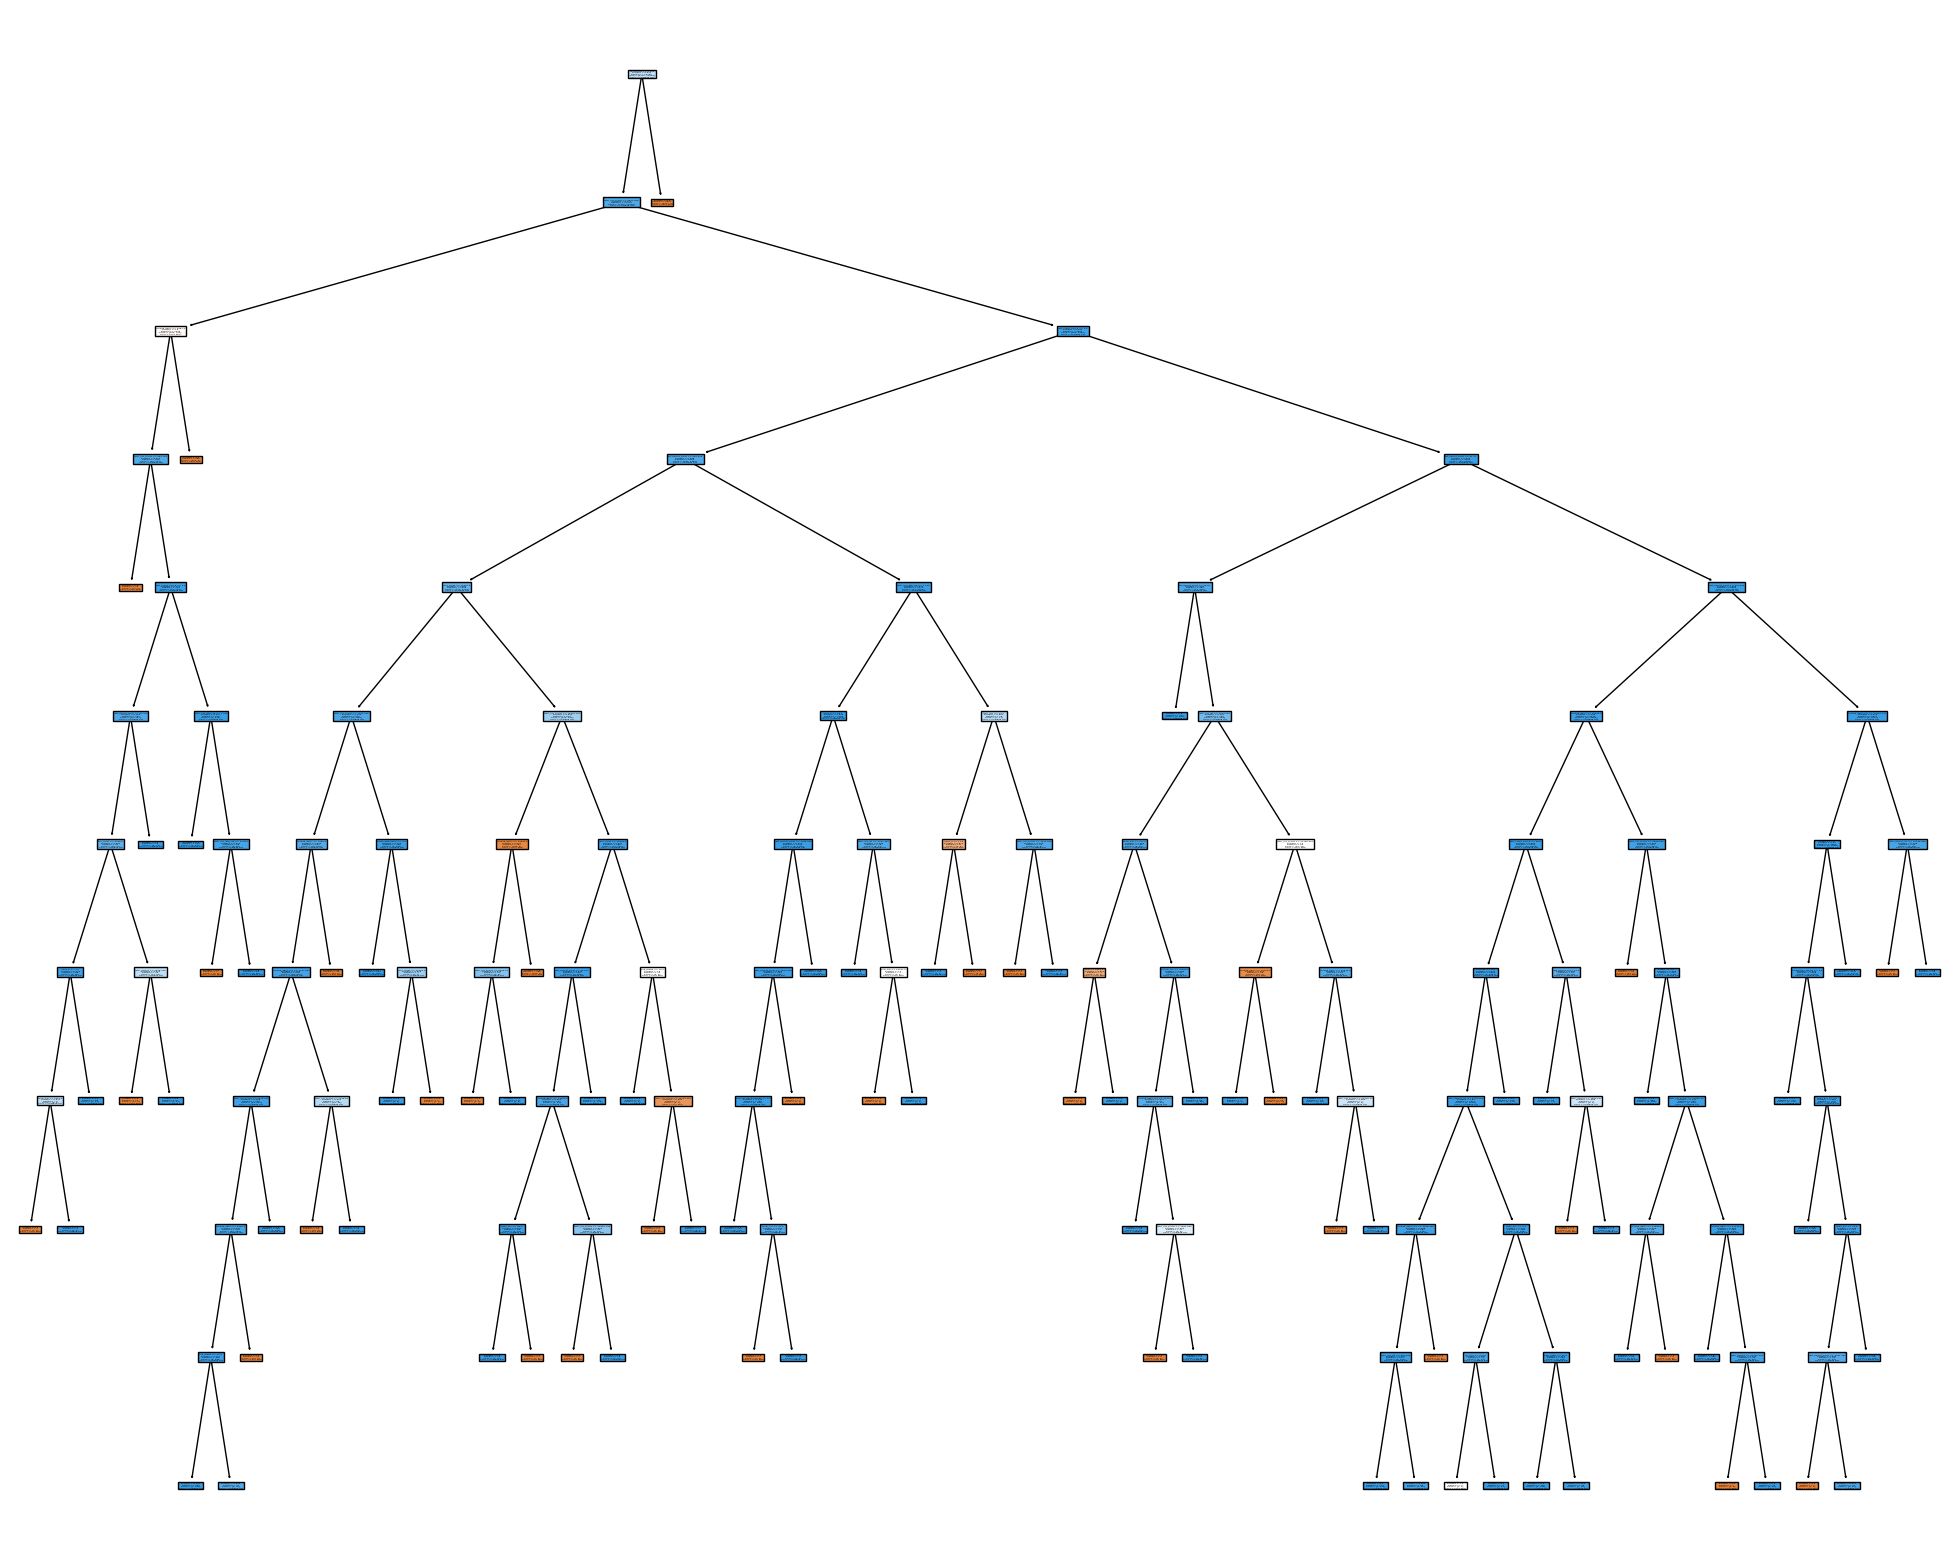

In [8]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_en, 
                   feature_names=features,  
                   class_names=y_train.unique(),
                   filled=True)

In [9]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix

In [10]:
y_train_pred_en = clf_en.predict(X_train)

### Training Data Performance

In [11]:
print("====== Training Data Confusion Matrix ======")
print(confusion_matrix(y_train, y_train_pred_en))

====== Training Data Confusion Matrix ======
[[ 6718    14]
 [    1 10047]]


In [12]:
print("====== Training Data Classification Report ======")
print(classification_report(y_train, y_train_pred_en))

====== Training Data Classification Report ======
              precision    recall  f1-score   support

 Charged Off       1.00      1.00      1.00      6732
  Fully Paid       1.00      1.00      1.00     10048

    accuracy                           1.00     16780
   macro avg       1.00      1.00      1.00     16780
weighted avg       1.00      1.00      1.00     16780



### Testing Data Performance

In [13]:
print("====== Testing Data Confusion Matrix ======")
print(confusion_matrix(y_test, y_pred_en))

====== Testing Data Confusion Matrix ======
[[1606   27]
 [  21 4955]]


In [14]:
print("====== Testing Data Classification Report ======")
print(classification_report(y_test, y_pred_en))

====== Testing Data Classification Report ======
              precision    recall  f1-score   support

 Charged Off       0.99      0.98      0.99      1633
  Fully Paid       0.99      1.00      1.00      4976

    accuracy                           0.99      6609
   macro avg       0.99      0.99      0.99      6609
weighted avg       0.99      0.99      0.99      6609



### Feature importance

In [15]:
importance = clf_en.feature_importances_
for i,v in enumerate(importance):
 print(features[i],':', v)

loan_amnt : 0.009135197406542749
funded_amnt : 0.08570858670586493
funded_amnt_inv : 0.0039243870295253055
term : 0.0
int_rate : 0.00019023145719901851
grade : 0.0008271508075832914
sub_grade : 0.000958131500412821
emp_length : 0.0
home_ownership : 0.00042469569436627655
annual_inc : 0.00044364277507063534
verification_status : 0.000287844558582054
issue_d : 0.0013707726507484544
purpose : 0.0005179206776696155
title : 0.00020002890764549524
addr_state : 0.0002829054047655412
dti : 0.0
delinq_2yrs : 0.0
earliest_cr_line : 0.0
inq_last_6mths : 0.0
open_acc : 0.0014657051987273435
pub_rec : 0.0
revol_bal : 0.0010780914473333683
revol_util : 0.0002890891343174023
total_acc : 0.00038051864813983314
out_prncp : 0.0
out_prncp_inv : 0.0
total_pymnt : 0.003234874669613559
total_pymnt_inv : 0.0011303463117260987
total_rec_prncp : 0.15726469157174183
total_rec_int : 0.0022451080733505244
total_rec_late_fee : 0.003769963477397489
recoveries : 0.680489229648575
collection_recovery_fee : 0.0
last_p

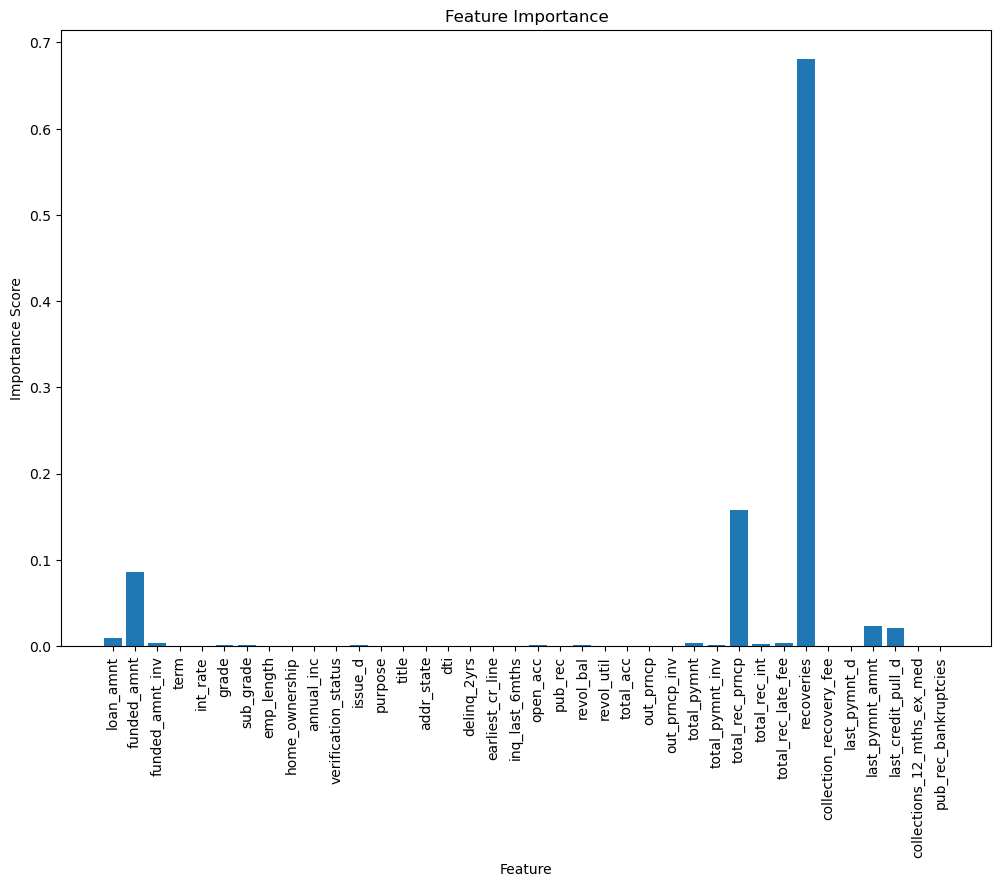

In [16]:
# plot feature importance
plt.figure(figsize=(12,8))
plt.bar(features, importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()

In [17]:
from sklearn.manifold import TSNE

#### T-sne data visualization

In [18]:
np.random.seed(0)

# Apply T-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_train)

In [19]:
y_train_pred_en_df = pd.DataFrame(data = y_train_pred_en).replace('Fully Paid',1).replace('Charged Off',0)

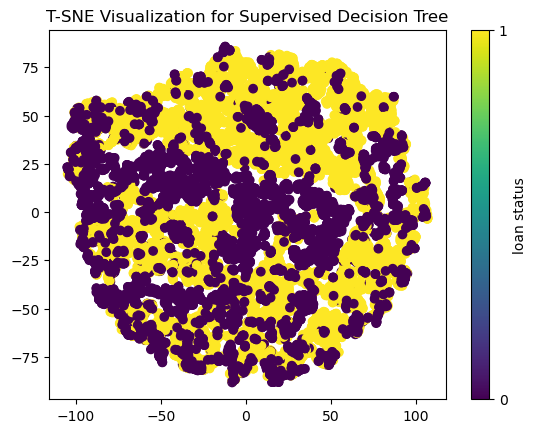

In [24]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_pred_en_df, cmap='viridis')
plt.title('T-SNE Visualization for Supervised Decision Tree')
plt.colorbar(ticks=[0, 1], label='loan status')
plt.show()

#### ROC curve

In [21]:
y_pred_en_df = pd.DataFrame(data = y_pred_en).replace('Fully Paid',1).replace('Charged Off',0)
y_test_df = y_test.replace('Fully Paid',1).replace('Charged Off',0)

In [22]:
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_en_df)
auc = roc_auc_score(y_test_df, y_pred_en_df)


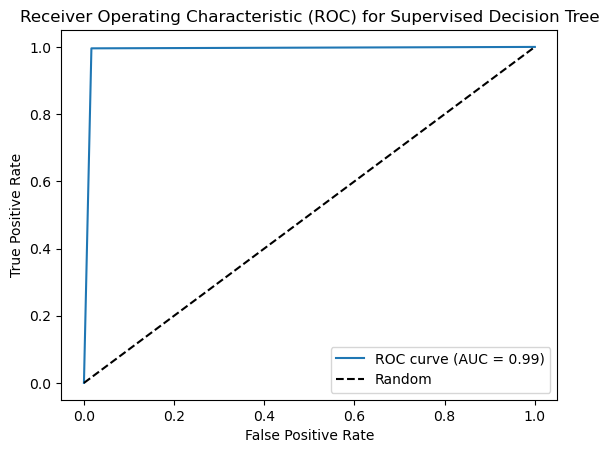

In [25]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Supervised Decision Tree')
plt.legend(loc='lower right')
plt.show()